<h1><b>DIGIT RECOGNITION</b></h1>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv("D:\\Downloads\\train.csv\\train.csv")

In [40]:
# Save the DataFrame as a CSV file using the full path
df.to_csv('../Digit Recognition/Data/train.csv', index=False)

In [41]:
df.shape

(42000, 785)

In [42]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [43]:
X = df.drop('label', axis = 1)
y = df['label']

In [44]:
X.shape

(42000, 784)

In [45]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [46]:
np.array(X.iloc[0])

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [47]:
np.array(X.iloc[0]).shape

(784,)

Convert into 28 * 28

In [48]:
img0 = np.array(X.iloc[0]).reshape(28, 28)

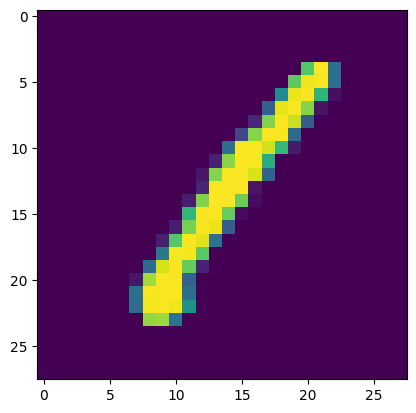

In [49]:
plt.imshow(img0)

<h3>Min_Max Scaling X</h3>

```
X_scaled = (X - X_min) / (X_max - X_min)

X_min = 0
X_max = 255
```

In [50]:
X_scaled = X/255

In [51]:
X_scaled.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h3><b>Tensorflow</b></h3>

TensorFlow is an open-source machine learning framework developed by Google. It provides a comprehensive ecosystem of tools, libraries, and resources for building and deploying machine learning models. TensorFlow allows you to define and train various types of neural networks, including deep learning models, to solve a wide range of tasks such as image classification, natural language processing, speech recognition, and more.

Key features of TensorFlow include:

1. **Graph-based computation**: TensorFlow uses a graph-based computation model, where computations are represented as a directed graph. Nodes in the graph represent operations, and edges represent the flow of data (tensors) between operations.

2. **Automatic differentiation**: TensorFlow automatically computes gradients for you, making it easier to implement and train complex models using techniques like backpropagation.

3. **Flexible architecture**: TensorFlow supports both low-level and high-level APIs. The low-level API allows you to have fine-grained control over your model, while the high-level APIs, such as Keras, provide a more user-friendly interface for rapid prototyping.

4. **Wide range of platform support**: TensorFlow is designed to run on a variety of platforms, including CPUs, GPUs, and even specialized hardware like TPUs (Tensor Processing Units). This allows you to scale your models to take advantage of available hardware resources.

5. **Model deployment**: TensorFlow provides tools for exporting trained models and serving them in production environments. It supports various deployment options, such as TensorFlow Serving, TensorFlow Lite for mobile and embedded devices, and TensorFlow.js for running models in web browsers.

Overall, TensorFlow has gained popularity among researchers and practitioners due to its flexibility, scalability, and extensive community support. It has become one of the most widely used frameworks for machine learning and deep learning.

<h3>One Hot Encoding on y</h3>

In [52]:
from tensorflow.keras.utils import to_categorical

In [53]:
y_cat = to_categorical(y, num_classes = 10)

In [54]:
y_cat

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [55]:
y_cat.shape

(42000, 10)

#### In Neural Network

- Two Hidden Layers 
    - In First Hidden & Second Hidden Layer Default Neuron is 16.
    
- Only One Output Layer 
    - There are 10 neurons in the output layer because No. of Classes = 10 

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

**Neural Network**

In [57]:
model = Sequential()
model.add(Dense(16, activation = 'relu', input_shape = (784,)))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [58]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [59]:
hist = model.fit(X_scaled, y_cat, epochs = 15, batch_size = 32)

Epoch 1/15
1313/1313 [==============================] - 4s 2ms/step - loss: 0.5803 - accuracy: 0.8297
Epoch 2/15
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2907 - accuracy: 0.9162
Epoch 3/15
1313/1313 [==============================] - 3s 3ms/step - loss: 0.2434 - accuracy: 0.9284
Epoch 4/15
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2135 - accuracy: 0.9364
Epoch 5/15
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1925 - accuracy: 0.9432
Epoch 6/15
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1782 - accuracy: 0.9471
Epoch 7/15
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1664 - accuracy: 0.9498
Epoch 8/15
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1596 - accuracy: 0.9531
Epoch 9/15
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1511 - accuracy: 0.9547
Epoch 10/15
1313/1313 [==============================] - 3s 2ms/step - loss: 0.144

In [60]:
model.predict(X_scaled.iloc[:5, :])

1/1 [==============================] - 0s 95ms/step


array([[4.40025577e-12, 9.99838233e-01, 1.16306342e-06, 4.63206788e-07,
        2.54146426e-06, 1.23410601e-07, 1.10126357e-05, 2.21034817e-08,
        1.46506150e-04, 3.21972471e-09],
       [1.00000000e+00, 1.14044336e-21, 1.59134323e-08, 1.36873818e-10,
        4.96753018e-18, 1.58629665e-09, 3.39862916e-10, 2.98528691e-09,
        3.15879767e-09, 4.57674981e-10],
       [1.09785084e-10, 9.98841584e-01, 6.76953323e-06, 1.44004589e-04,
        1.06541047e-05, 6.72653471e-07, 6.37753838e-05, 2.50872581e-05,
        9.06128087e-04, 1.32489652e-06],
       [5.57885552e-03, 2.49721797e-05, 2.85242684e-02, 2.24567950e-03,
        8.78855705e-01, 2.62807449e-03, 5.77978231e-02, 3.28160799e-03,
        2.63852393e-03, 1.84243806e-02],
       [1.00000000e+00, 7.54616186e-28, 6.02578196e-11, 1.24650263e-13,
        4.03442349e-22, 8.19438406e-11, 7.74488720e-12, 4.18559848e-12,
        2.97415731e-10, 2.11281391e-14]], dtype=float32)

In [61]:
model.predict(X_scaled.iloc[:5, :]).argmax(axis = 1)

1/1 [==============================] - 0s 33ms/step


array([1, 0, 1, 4, 0], dtype=int64)

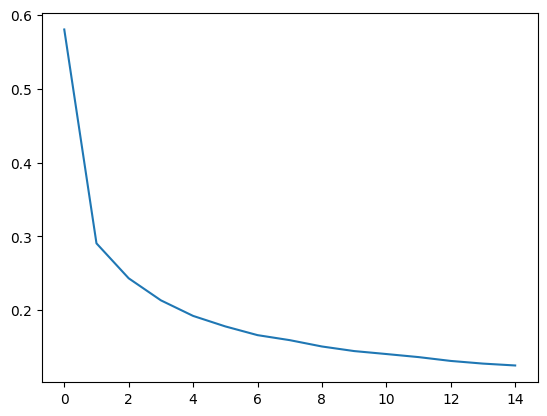

In [62]:
plt.plot(hist.history['loss'])

In [63]:
import cv2

In [65]:
img = cv2.imread("D:\\FSDS\DeepLearning\\Digit Recognition\\Data\\Untitled.jpg")

In [66]:
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

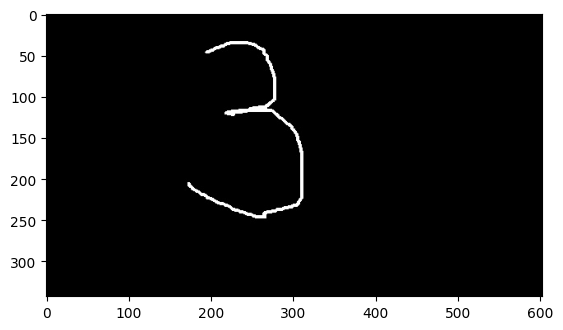

In [67]:
plt.imshow(img)

In [68]:
img.shape

(343, 603, 3)

- The above image is color image.
343 -- Red

603 -- Green

3 -- Blue

- But i want gray color image

In [69]:
img1 = cv2.imread("D:\\FSDS\DeepLearning\\Digit Recognition\\Data\\Untitled.jpg", 0)

- 0 -- It indicates grayscale/black_white image.

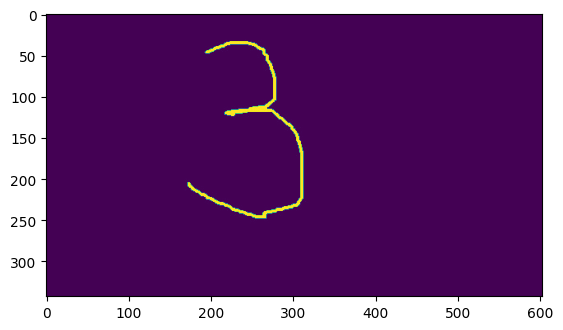

In [70]:
plt.imshow(img1)

In [71]:
img1.shape

(343, 603)

Reshape -- No. of pixels hum kam nahi kr sakte.

Resize -- No. of pixels hum kr sakte hai.

### Change the size of Image

In [73]:
img1 = cv2.resize(img1, (28,28))

In [75]:
img1.shape

(28, 28)

In [76]:
img1 = img1/255

In [77]:
img1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [79]:
model.predict(img1.reshape(1,784)).argmax()

1/1 [==============================] - 0s 32ms/step


1

In [86]:
def get_prediction(path):
    img = cv2.imread(path, 0)
    img = cv2.resize(img, (28,28))/255   
    return model.predict(img.reshape(1,784)).argmax()

In [87]:
get_prediction("D:\\FSDS\DeepLearning\\Digit Recognition\\Data\\Untitled.jpg")

1/1 [==============================] - 0s 31ms/step


1